# 📦 Import de paquetes necesarios

In [96]:
import unicodedata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler





# 🚜 Carga del dataset




In [97]:
path = "/content/Inventario_de_movimientos_en_masa_6829763638631547229.csv"
df = pd.read_csv(path)
df.head()


,FID,OBJECTID,ID,Inentario_Movimiento,F35DOV_TIP,Tipo_Movimiento,Subtipo_Movimiento,Subtipo_nombre,Etiqueta,Representación_mapa,ESRI_OID,x,y
0,1,-7.583971e+56,1752,31553,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,130,-8.430070e+06,258331.820585
1,2,-7.583971e+56,1753,31534,67,Caida,20,Caida de detritos,Caida,cd,131,-8.442006e+06,251832.989531
2,3,-7.583971e+56,1754,31551,69,Deslizamiento,82,Deslizamiento traslacional planar,Deslizamiento,dtp,132,-8.442965e+06,256351.196330
3,4,-7.583971e+56,1755,31540,67,Caida,15,Caida de roca,Caida,cr,133,-8.442625e+06,255639.415530
4,5,-7.583971e+56,1757,31538,67,Caida,15,Caida de roca,Caida,cr,134,-8.442501e+06,255391.840375


❌ Eliminamos F35DOV_TIP y Subtipo_Movimiento

In [98]:
cols_to_drop = ["F35DOV_TIP", "Subtipo_Movimiento","Representación_mapa"]
df_clean = df.drop(columns=cols_to_drop)
df_clean.head()


,FID,OBJECTID,ID,Inentario_Movimiento,Tipo_Movimiento,Subtipo_nombre,Etiqueta,ESRI_OID,x,y
0,1,-7.583971e+56,1752,31553,Deslizamiento,Deslizamiento traslacional,Deslizamiento,130,-8.430070e+06,258331.820585
1,2,-7.583971e+56,1753,31534,Caida,Caida de detritos,Caida,131,-8.442006e+06,251832.989531
2,3,-7.583971e+56,1754,31551,Deslizamiento,Deslizamiento traslacional planar,Deslizamiento,132,-8.442965e+06,256351.196330
3,4,-7.583971e+56,1755,31540,Caida,Caida de roca,Caida,133,-8.442625e+06,255639.415530
4,5,-7.583971e+56,1757,31538,Caida,Caida de roca,Caida,134,-8.442501e+06,255391.840375


Porcentaje de valores nulos por columna

In [99]:
(df_clean.isnull().mean() * 100).round(2)

,0
FID,0.0
OBJECTID,0.0
ID,0.0
Inentario_Movimiento,0.0
Tipo_Movimiento,0.0
Subtipo_nombre,0.0
Etiqueta,0.0
ESRI_OID,0.0
x,0.0
y,0.0


♊ Deteccion de duplicados

In [100]:
duplicados = df_clean.duplicated().sum()
duplicados

np.int64(0)

🐱 Identificacion de columnas categoricas y estandarizacion ()

In [101]:
cat_cols = df_clean.select_dtypes(include='object').columns
cat_cols

Index(['Tipo_Movimiento', 'Subtipo_nombre', 'Etiqueta'], dtype='object')

In [102]:
def normalize_text(s):
    if isinstance(s, str):
        s = s.strip().lower()
        s = ''.join(
            c for c in unicodedata.normalize('NFD', s)
            if unicodedata.category(c) != 'Mn'
        )
        return s
    return s


for col in cat_cols:
    df_clean[col] = df_clean[col].apply(normalize_text)


In [103]:
for col in cat_cols:
    print(col, "→", df_clean[col].unique()[:10])

Tipo_Movimiento → ['deslizamiento' 'caida' 'reptacion' 'volcamiento' 'flujo'
 'deformaciones gravitacionales' 'propagacion lateral']
Subtipo_nombre → ['deslizamiento traslacional' 'caida de detritos'
 'deslizamiento traslacional planar' 'caida de roca' 'reptacion de suelos'
 'volcamiento de roca' 'deslizamiento rotacional' 'avalancha de detritos'
 'flujo de detritos' 'flujo de tierra']
Etiqueta → ['deslizamiento' 'caida' 'reptacion' 'volcamiento'
 'deslizamiento rotacional' 'avalancha' 'flujo'
 'deformacion gravitacional profunda' 'deslizamiento por licuacion'
 'propagacion lateral']


In [104]:
summary = pd.DataFrame({
    "Columna": df_clean.columns,
    "Tipo_de_Dato": df_clean.dtypes.astype(str),
    "Valores_Nulos": df_clean.isnull().sum().values,
    "Valores_Únicos": df_clean.nunique().values
})

summary

,Columna,Tipo_de_Dato,Valores_Nulos,Valores_Únicos
FID,FID,int64,0,6826
OBJECTID,OBJECTID,float64,0,4
ID,ID,int64,0,6826
Inentario_Movimiento,Inentario_Movimiento,int64,0,6826
Tipo_Movimiento,Tipo_Movimiento,object,0,7
Subtipo_nombre,Subtipo_nombre,object,0,24
Etiqueta,Etiqueta,object,0,10
ESRI_OID,ESRI_OID,int64,0,6826
x,x,float64,0,6060
y,y,float64,0,6177


# 🌍 Estadísticos del conjunto de datos y de las variables involucradas

In [105]:
cat_cols = df_clean.select_dtypes(include='object').columns
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

cat_cols, num_cols

for col in cat_cols:
    print(f"\n==================== {col.upper()} ====================")
    print(df_clean[col].value_counts().head(10))



==================== TIPO_MOVIMIENTO ====================
Tipo_Movimiento
deslizamiento                    3900
caida                            1196
flujo                            1064
reptacion                         595
volcamiento                        59
deformaciones gravitacionales       8
propagacion lateral                 4
Name: count, dtype: int64

==================== SUBTIPO_NOMBRE ====================
Subtipo_nombre
deslizamiento traslacional           2130
deslizamiento rotacional             1475
caida de detritos                     547
reptacion de suelos                   515
caida de roca                         464
flujo de detritos                     423
flujo de lodo                         257
flujo de tierra                       219
deslizamiento traslacional planar     218
caida de tierras                      185
Name: count, dtype: int64

==================== ETIQUETA ====================
Etiqueta
deslizamiento                         2420
deslizamie

In [106]:
cat_summary = {}

for col in cat_cols:
    abs_freq = df_clean[col].value_counts()
    rel_freq = df_clean[col].value_counts(normalize=True).round(3)

    cat_summary[col] = pd.DataFrame({
        "Frecuencia Absoluta": abs_freq,
        "Frecuencia Relativa": rel_freq
    })
for col in cat_summary.keys():
    print(f"\n==================== {col.upper()} ====================")
    display(cat_summary[col].head(len(cat_summary[col])))


==================== TIPO_MOVIMIENTO ====================


,Frecuencia Absoluta,Frecuencia Relativa
Tipo_Movimiento,,
deslizamiento,3900,0.571
caida,1196,0.175
flujo,1064,0.156
reptacion,595,0.087
volcamiento,59,0.009
deformaciones gravitacionales,8,0.001
propagacion lateral,4,0.001



==================== SUBTIPO_NOMBRE ====================


,Frecuencia Absoluta,Frecuencia Relativa
Subtipo_nombre,,
deslizamiento traslacional,2130,0.312
deslizamiento rotacional,1475,0.216
caida de detritos,547,0.080
reptacion de suelos,515,0.075
caida de roca,464,0.068
flujo de detritos,423,0.062
flujo de lodo,257,0.038
flujo de tierra,219,0.032
deslizamiento traslacional planar,218,0.032



==================== ETIQUETA ====================


,Frecuencia Absoluta,Frecuencia Relativa
Etiqueta,,
deslizamiento,2420,0.355
deslizamiento rotacional,1475,0.216
caida,1196,0.175
flujo,951,0.139
reptacion,595,0.087
avalancha,113,0.017
volcamiento,59,0.009
deformacion gravitacional profunda,8,0.001
deslizamiento por licuacion,5,0.001


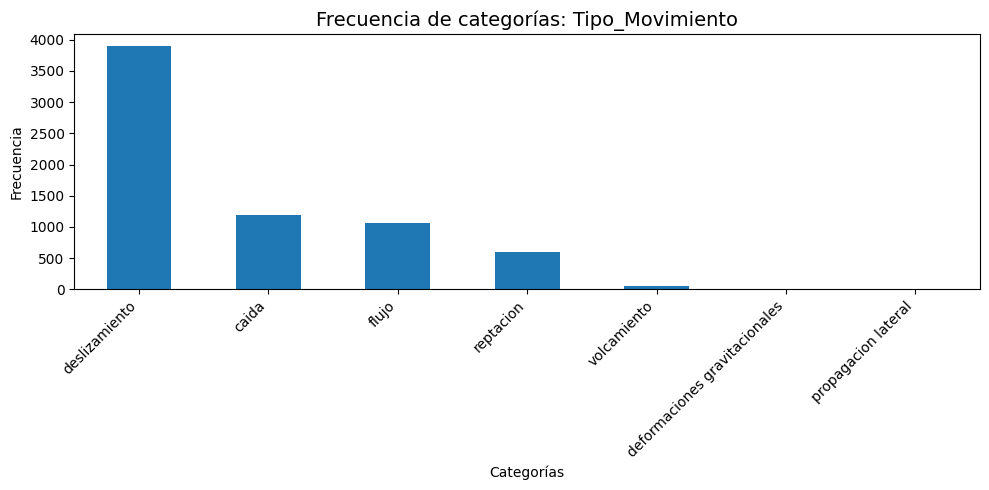

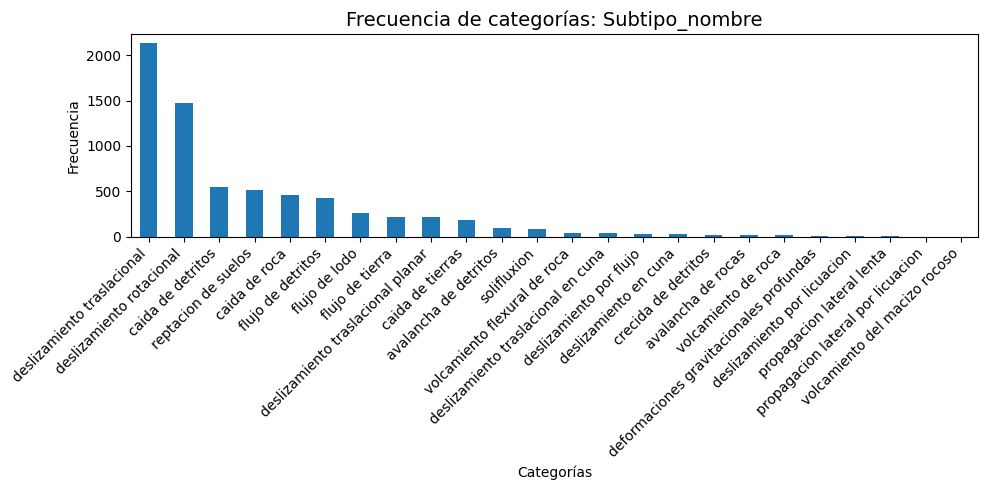

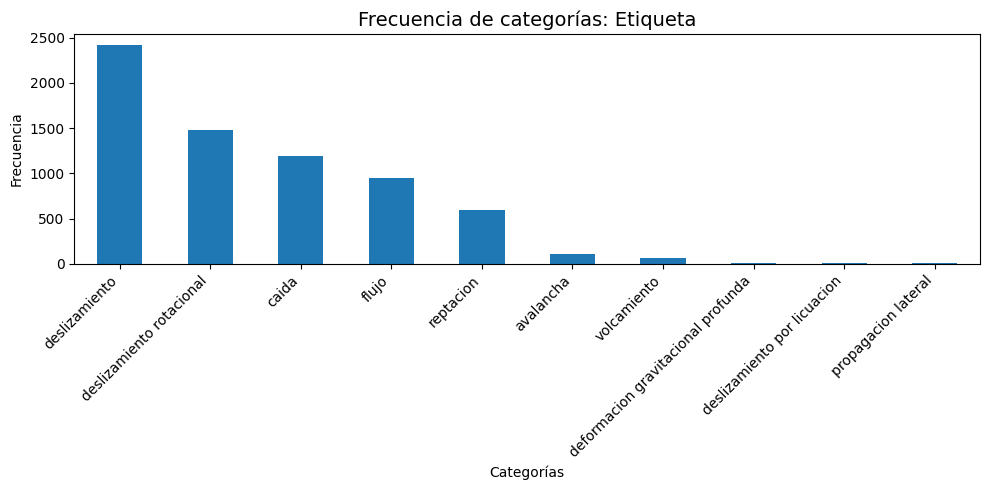

In [107]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    df_clean[col].value_counts().plot(kind='bar')
    plt.title(f"Frecuencia de categorías: {col}", fontsize=14)
    plt.xlabel("Categorías")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

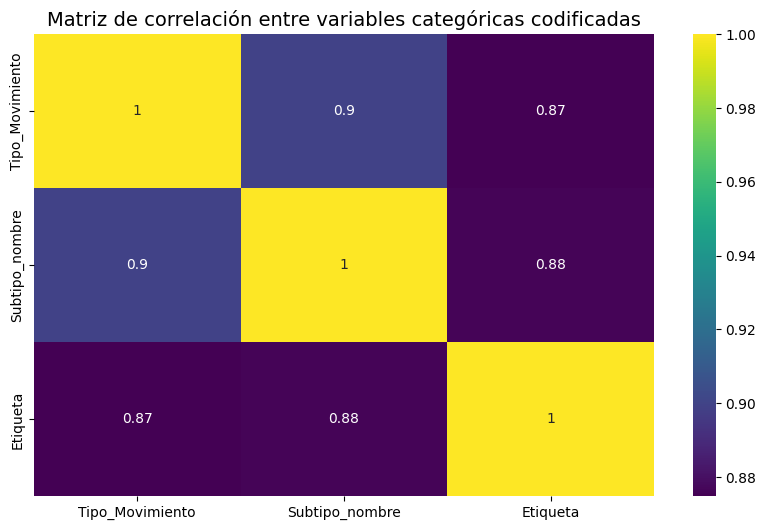

In [108]:
df_codes = df_clean[cat_cols].apply(lambda x: x.astype('category').cat.codes)

plt.figure(figsize=(10, 6))
sns.heatmap(df_codes.corr(), annot=True, cmap="viridis")
plt.title("Matriz de correlación entre variables categóricas codificadas", fontsize=14)
plt.show()

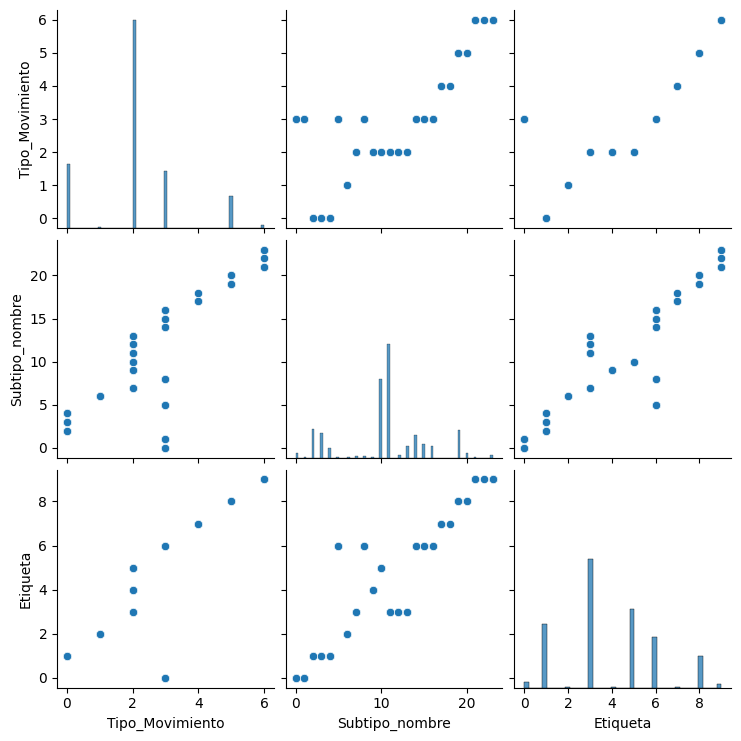

In [109]:
sns.pairplot(df_codes[cat_cols[:3]])
plt.show()

# 💽 Seleccion de variable objetivo y definicion del modelo

In [110]:
target = "Subtipo_nombre"

X_COL = "x"
Y_COL = "y"

# Contar cuántos registros tiene cada subtipo
counts = df_clean[target].value_counts()
valid_classes = counts[counts >= 2].index  # puedes poner >=5 si quieres más robusto

# Filtrar el DataFrame para quedarte solo con esas clases
df_filtrado = df_clean[df_clean[target].isin(valid_classes)].copy()

print("Clases originales:", len(counts))
print("Clases usadas después de filtrar:", len(valid_classes))

X = df_filtrado[[X_COL, Y_COL]].copy()
y = df_filtrado[target].copy()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split con estratificación (ya no hay clases con 1 solo dato)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

Clases originales: 24
Clases usadas después de filtrar: 22


Regresion logistica

In [111]:
m1 = LogisticRegression(max_iter=2000)
m1.fit(X_train, y_train)


LogisticRegression(max_iter=2000)

Arboles de decision

In [112]:
m2 = DecisionTreeClassifier(max_depth=None, random_state=42)
m2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Random forest

In [113]:
m3 = RandomForestClassifier(n_estimators=200, random_state=42)
m3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

# 📏 Evaluacion con metricas

In [114]:
pred1 = m1.predict(X_test)
pred2 = m2.predict(X_test)
pred3 = m3.predict(X_test)

print("Regresión Logística:")
print(classification_report(y_test, pred1))
print(confusion_matrix(y_test, pred1))

print("Árbol de decisión:")
print(classification_report(y_test, pred2))
print(confusion_matrix(y_test, pred2))

print("Random Forest:")
print(classification_report(y_test, pred3))
print(confusion_matrix(y_test, pred3))

Regresión Logística:
                                         precision    recall  f1-score   support

                  avalancha de detritos       0.00      0.00      0.00        29
                     avalancha de rocas       0.00      0.00      0.00         5
                      caida de detritos       0.00      0.00      0.00       164
                          caida de roca       0.00      0.00      0.00       139
                       caida de tierras       0.00      0.00      0.00        56
                    crecida de detritos       0.00      0.00      0.00         6
deformaciones gravitacionales profundas       0.00      0.00      0.00         2
                  deslizamiento en cuna       0.00      0.00      0.00         9
                deslizamiento por flujo       0.00      0.00      0.00        10
            deslizamiento por licuacion       0.00      0.00      0.00         1
               deslizamiento rotacional       0.39      0.35      0.37       443
      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Validacion cruzada

In [115]:
scores = cross_val_score(m3, X, y, cv=5, scoring='accuracy')
scores.mean(), scores.std()

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


(np.float64(0.2658280429248171), np.float64(0.02872824565824215))